<a href="https://colab.research.google.com/github/bonitr02/datasci_3_eda/blob/main/datasci_3_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Exploratory Data Analysis (EDA)

## Load packages

In [155]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install pandas_profiling
from pandas_profiling import ProfileReport

## Load dataset

In [37]:
df = pd.read_csv('/content/NCHS_-_Drug_Poisoning_Mortality_by_State__United_States.csv')


## Look for missingness


In [29]:
# Handling whitespace as missing data
df.replace(" ", pd.NA, inplace=True)

### Look for dataset descriptors

In [97]:
df.describe()

,Crude Death Rate,Standard Error for Crude Rate,Lower Confidence Limit for Crude Rate,Upper Confidence Limit for Crude Rate,Age-adjusted Rate,Standard Error for Age-adjusted Rate,Lower Confidence Limit for Age-adjusted Rate,Upper Confidence Limit for Age-adjusted Rate,US Crude Rate,US Age-adjusted Rate
count,2862.000000,2862.000000,2862.000000,2862.000000,1134.000000,1134.000000,1134.000000,1134.000000,2862.000000,2862.000000
mean,10.658853,0.435556,9.822960,11.550930,11.767422,0.552757,10.701018,12.886507,11.481156,11.440756
std,8.576254,0.327640,8.327741,8.828572,6.034103,0.398338,5.738849,6.386080,3.487083,3.481560
min,0.038900,0.014280,0.008000,0.095100,1.820500,0.046710,0.940700,2.210100,6.038200,6.057000
25%,3.970475,0.199910,3.392700,4.671150,7.521925,0.263120,6.679100,8.457450,8.888100,8.876500
50%,9.074200,0.361460,8.209800,9.949700,10.956250,0.466440,10.021000,12.052900,11.970350,11.886100
75%,14.895425,0.571330,13.723875,16.047750,14.626600,0.742965,13.335475,15.892625,13.267400,13.185200
max,68.312200,2.407800,66.889100,69.735300,52.021100,2.406580,48.508800,55.533400,19.692500,19.785100


In [31]:
df.columns

Index(['State', 'Year', 'Sex', 'Age Group', 'Race and Hispanic Origin',
       'Deaths', 'Population', 'Crude Death Rate',
       'Standard Error for Crude Rate',
       'Lower Confidence Limit for Crude Rate',
       'Upper Confidence Limit for Crude Rate', 'Age-adjusted Rate',
       'Standard Error for Age-adjusted Rate',
       'Lower Confidence Limit for Age-adjusted Rate',
       'Upper Confidence Limit for Age-adjusted Rate',
       'State Crude Rate in Range', 'US Crude Rate', 'US Age-adjusted Rate',
       'Unit'],
      dtype='object')

In [103]:
df.dtypes

State                                            object
Year                                             object
Sex                                              object
Age Group                                        object
Race and Hispanic Origin                         object
Deaths                                            int64
Population                                        int64
Crude Death Rate                                float64
Standard Error for Crude Rate                   float64
Lower Confidence Limit for Crude Rate           float64
Upper Confidence Limit for Crude Rate           float64
Age-adjusted Rate                               float64
Standard Error for Age-adjusted Rate            float64
Lower Confidence Limit for Age-adjusted Rate    float64
Upper Confidence Limit for Age-adjusted Rate    float64
State Crude Rate in Range                        object
US Crude Rate                                   float64
US Age-adjusted Rate                            

### Modify column types and remove special characters

In [102]:
df['Year'] = df['Year'].apply(str)
df = df.replace(',', '', regex=True)
df['Deaths'] = df['Deaths'].apply(int)
df['Population'] = df['Population'].apply(int)

        State  Year         Sex Age Group Race and Hispanic Origin  Deaths  \
0     Alabama  1999  Both Sexes  All Ages    All Races-All Origins     169   
1     Alabama  2000  Both Sexes  All Ages    All Races-All Origins     197   
2     Alabama  2001  Both Sexes  All Ages    All Races-All Origins     216   
3     Alabama  2002  Both Sexes  All Ages    All Races-All Origins     211   
4     Alabama  2003  Both Sexes  All Ages    All Races-All Origins     197   
...       ...   ...         ...       ...                      ...     ...   
2857  Wyoming  2012  Both Sexes  All Ages    All Races-All Origins      98   
2858  Wyoming  2013  Both Sexes  All Ages    All Races-All Origins      98   
2859  Wyoming  2014  Both Sexes  All Ages    All Races-All Origins     109   
2860  Wyoming  2015  Both Sexes  All Ages    All Races-All Origins      96   
2861  Wyoming  2016  Both Sexes  All Ages    All Races-All Origins      99   

      Population  Crude Death Rate  Standard Error for Crude Ra

## Univariate Analysis

### Calculate measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR)


In [48]:
# Calculate mean, median, and mode
mean_deathRate = df['Crude Death Rate'].mean()
median_deathRate = df['Crude Death Rate'].median()
mode_deathRate = df['Crude Death Rate'].mode().iloc[0]

# Calculate range
range_deathRate = df['Crude Death Rate'].max() - df['Crude Death Rate'].min()

# Calculate variance and standard deviation
variance_deathRate = np.var(df['Crude Death Rate'])
std_deviation_deathRate = np.std(df['Crude Death Rate'])

# Calculate percentiles
percentile_0_deathRate = np.percentile(df['Crude Death Rate'], 0)
percentile_25_deathRate = np.percentile(df['Crude Death Rate'], 25)
percentile_50_deathRate= np.percentile(df['Crude Death Rate'], 50)
percentile_75_deathRate= np.percentile(df['Crude Death Rate'], 75)
percentile_100_deathRate= np.percentile(df['Crude Death Rate'], 100)

# IQR
data_description = df['Crude Death Rate'].describe()
print(data_description)

count    2862.000000
mean       10.658853
std         8.576254
min         0.038900
25%         3.970475
50%         9.074200
75%        14.895425
max        68.312200
Name: Crude Death Rate, dtype: float64


In [53]:
# Print results
print("Mean Crude Death Rate:", mean_deathRate)
print("Median Crude Death Rate:", median_deathRate)
print("Mode Crude Death Rate:", mode_deathRate)
print("Variance Crude Death Rate:", variance_deathRate)
print("Standard Deviation Crude Death Rate:", std_deviation_deathRate)
print("0th Percentile Crude Death Rate:", percentile_0_deathRate)
print("25th Percentile Crude Death Rate:", percentile_25_deathRate)
print("50th Percentile Crude Death Rate:", percentile_50_deathRate)
print("75th Percentile Crude Death Rate:", percentile_75_deathRate)
print("100th Percentile Crude Death Rate:", percentile_100_deathRate)
print("Data Range Crude Death Rate:", range_deathRate)

Mean Crude Death Rate: 10.658853004891684
Median Crude Death Rate: 9.074200000000001
Mode Crude Death Rate: 0.1452
Variance Crude Death Rate: 73.52643723857763
Standard Deviation Crude Death Rate: 8.57475581218367
0th Percentile Crude Death Rate: 0.0389
25th Percentile Crude Death Rate: 3.970475
50th Percentile Crude Death Rate: 9.074200000000001
75th Percentile Crude Death Rate: 14.895425
100th Percentile Crude Death Rate: 68.3122
Data Range Crude Death Rate: 68.2733


### Visualize the distribution of select numerical variables using histograms.

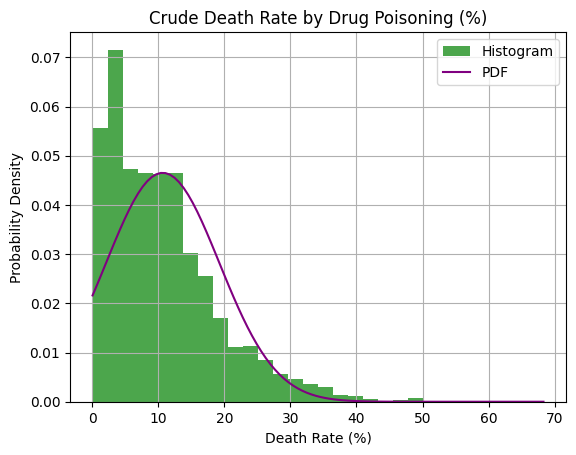

In [63]:
# Create a histogram
plt.hist(df['Crude Death Rate'], bins=30, density=True, alpha=0.7, color='green', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(df['Crude Death Rate']), max(df['Crude Death Rate']), 100)
pdf = (1/(std_deviation_deathRate * np.sqrt(2*np.pi))) * np.exp(-(x - mean_deathRate)**2 / (2*std_deviation_deathRate**2))
plt.plot(x, pdf, color='purple', label='PDF')

plt.title('Crude Death Rate by Drug Poisoning (%)')
plt.xlabel('Death Rate (%)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## Bivariate Analysis

### Analyze the relationship between pairs of variables.
Use scatter plots to explore potential relationships between two numerical variables.

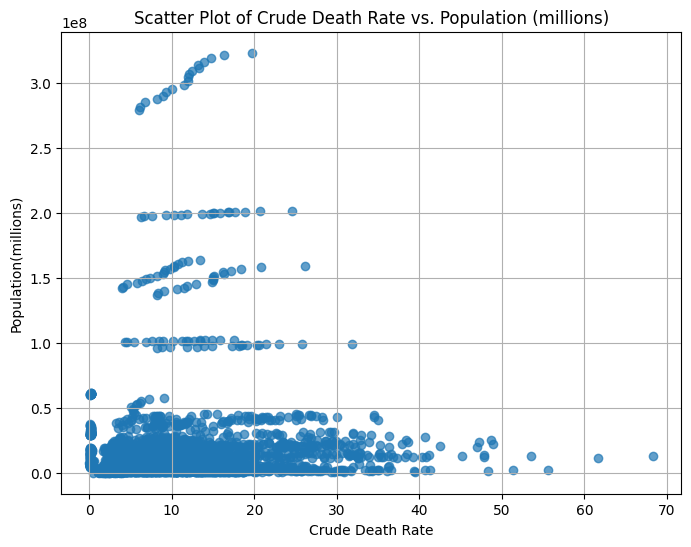

In [137]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Crude Death Rate'], df['Population'], alpha=0.7)
plt.xlabel('Crude Death Rate')
plt.ylabel('Population(millions)')
plt.title('Scatter Plot of Crude Death Rate vs. Population (millions)')
plt.grid()
plt.show()

### For categorical and numerical variable pairs, use boxplots.

<Axes: xlabel='Crude Death Rate', ylabel='Age Group'>

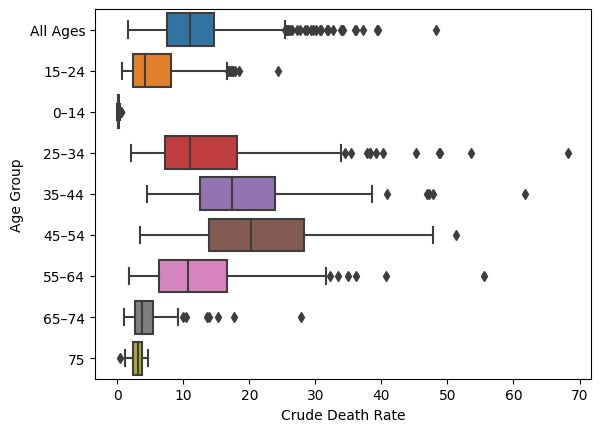

In [154]:
sns.boxplot(x = df['Crude Death Rate'],
            y = df['Age Group']
            )

### Compute correlation coefficients for numerical variables.

No strong correlation coefficients observed



In [138]:
correlation_matrix_1 = df[['Crude Death Rate', 'Population']].corr()

In [139]:
print("Correlation Matrix 1:\n", correlation_matrix_1)

Correlation Matrix 1:
                   Crude Death Rate  Population
Crude Death Rate          1.000000    0.064681
Population                0.064681    1.000000


## Handling Outliers

### Identify outliers in your dataset using the IQR method

In [151]:
# Calculate quartiles and IQR
q1 = np.percentile(df['Crude Death Rate'], 25)
q3= np.percentile(df['Crude Death Rate'], 75)
iqr = q3 - q1

# Set threshold for outlier detection
threshold_lower = q1 - 1.5 * iqr
threshold_upper = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in df['Crude Death Rate'] if x < threshold_lower or x > threshold_upper]

print("Outliers:", outliers)


Outliers: [39.4909, 31.9813, 33.9735, 32.6934, 31.7148, 36.0355, 37.2728, 36.193, 34.5657, 35.0456, 34.5224, 36.3157, 36.213, 32.7557, 38.331, 48.658, 33.9418, 38.5824, 47.2305, 31.9374, 31.9337, 32.948, 34.1706, 36.3458, 40.7074, 32.5928, 31.5966, 33.6311, 31.9159, 37.8938, 48.8767, 36.3055, 46.9266, 31.5127, 32.8727, 35.279, 42.5232, 32.2316, 36.5197, 35.0995, 41.2706, 34.8307, 31.6062, 34.2067, 51.3474, 34.9414, 33.4236, 40.668, 55.6072, 32.5854, 32.9242, 33.9243, 35.3456, 39.2237, 38.2611, 40.2797, 45.1858, 53.4989, 68.3122, 31.3719, 32.2623, 31.5946, 31.5174, 32.2715, 34.9333, 35.5953, 36.8578, 40.804, 47.8689, 61.698, 32.8089, 32.5417, 32.8406, 35.1791, 35.0899, 36.5148, 38.4767, 41.143, 47.8431, 31.6747, 31.8447, 34.2251, 33.8859, 39.314, 48.2769]


### Decide on an approach to handle these outliers (e.g., remove, replace, or retain) and justify your decision in a markdown cell.

#### I would retain the outliers because they represent important, although few events involving spikes in mortality - whether across different states or age groups

## Automated Analysis

### Automated Analysis using Pandas Profiling

In [34]:
report = ProfileReport(df)
report.to_file('eda_reportHHA507.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]